# **Tugas 2**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  

### 1. Pengertian Outlier Deteksi
Outlier detection (deteksi outlier) adalah proses mengidentifikasi data yang memiliki karakteristik yang sangat berbeda atau menyimpang dari mayoritas data lainnya dalam sebuah dataset. Outlier bisa muncul karena kesalahan pengukuran, variabilitas alami dalam data, atau kejadian yang jarang terjadi tetapi signifikan.

### 2. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier
K-Nearest Neighbors (KNN) bisa digunakan untuk deteksi outlier karena algoritma ini berbasis pada jarak antar data dalam suatu dataset. Outlier biasanya merupakan titik data yang memiliki jarak yang jauh dari mayoritas data lainnya. Berikut beberapa alasan utama mengapa KNN efektif untuk mendeteksi outlier:
1. Menggunakan Jarak Antar Titik Data
KNN bekerja dengan menghitung jarak antara suatu titik dengan titik-titik lain dalam dataset. Jika sebuah titik memiliki jarak yang jauh dari tetangga terdekatnya, maka besar kemungkinan bahwa titik tersebut adalah outlier.

Outlier memiliki sedikit tetangga dekat.
Jarak rata-rata ke tetangga terdekat lebih besar dibanding titik lainnya.
2. Tidak Bergantung pada Distribusi Data
Berbeda dengan metode statistik seperti Z-score atau IQR yang mengasumsikan data mengikuti distribusi tertentu (misalnya normal), KNN tidak memiliki asumsi khusus. Ini membuatnya lebih fleksibel dalam mendeteksi outlier dalam data yang tidak berdistribusi normal.

3. Adaptif terhadap Struktur Data
KNN dapat digunakan dalam berbagai jenis dataset, baik yang berdimensi rendah maupun berdimensi tinggi. Jika pola dalam data kompleks, KNN tetap bisa mendeteksi titik-titik yang berada di luar pola utama.

4. Dapat Digunakan dalam Berbagai Jenis Outlier
KNN dapat mendeteksi berbagai jenis outlier, seperti:

Global Outlier: Titik data yang benar-benar berbeda dari keseluruhan dataset.
Local Outlier: Titik data yang berbeda dari kelompok kecil di sekitarnya tetapi mungkin tidak ekstrem dalam skala global.
5. Bisa Digunakan dengan Metode Berbasis Kepadatan (LOF - Local Outlier Factor)
Variasi dari KNN, seperti Local Outlier Factor (LOF), mengevaluasi seberapa padat suatu titik dibandingkan dengan tetangga sekitarnya. Jika sebuah titik memiliki kepadatan yang jauh lebih rendah dibanding tetangganya, maka kemungkinan besar itu adalah outlier.

Kesimpulan
KNN efektif untuk deteksi outlier karena:
 Menggunakan jarak untuk mendeteksi titik yang jauh dari yang lain.
1. Tidak memerlukan asumsi distribusi data.
2. Adaptif terhadap data berdimensi tinggi dan kompleks.
3. Mampu mendeteksi berbagai jenis outlier.

Metode ini sangat berguna dalam berbagai aplikasi, seperti deteksi anomali dalam data keuangan, sistem keamanan, dan pemantauan kinerja mesin.

Code tersebut digunakan untuk menginstal dua pustaka Python yang berfungsi sebagai driver untuk menghubungkan aplikasi Python dengan database tertentu.

1. pymysql

Digunakan untuk berinteraksi dengan database MySQL atau MariaDB.
Memungkinkan Python untuk melakukan operasi seperti mengambil, menambahkan, mengubah, atau menghapus data dalam database MySQL.

2. psycopg2

Digunakan untuk berkomunikasi dengan database PostgreSQL.
Memungkinkan Python menjalankan query, mengelola transaksi, dan mengakses data dalam PostgreSQL.

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00


Kode dibawah ini berfungsi untuk mendeteksi outlier dalam dataset Iris yang disimpan dalam dua database berbeda: PostgreSQL dan MySQL. Berikut adalah penjelasan langkah demi langkah:

1. Menghubungkan ke Database
Kode mengambil data dari PostgreSQL (get_pg_data()) dan MySQL (get_mysql_data()).
Koneksi dibuat dengan pustaka psycopg2 untuk PostgreSQL dan pymysql untuk MySQL.
Setelah mengambil data menggunakan query SELECT * FROM ..., hasilnya dikonversi menjadi DataFrame Pandas.
2. Menggabungkan Data
Data dari kedua database digabungkan (pd.merge()) berdasarkan kolom "id" dan "class", hanya menyimpan baris yang cocok di kedua database.
3. Menghitung Jarak Euclidean
Fitur numerik (petal_length, petal_width, sepal_length, sepal_width) diambil sebagai data numerik.
Jarak Euclidean dihitung antara setiap baris dan baris terakhir sebagai referensi.
Euclidean distance mengukur seberapa jauh suatu titik dari titik referensi dalam ruang fitur.
4. Menentukan Outlier
Threshold outlier ditentukan menggunakan persentil 93.5% dari distribusi jarak.
Baris dengan jarak lebih besar dari threshold dianggap outlier (ditandai True).
5. Menampilkan Data
Data hasil deteksi outlier dicetak dalam bentuk tabel.
6. Visualisasi Outlier
Scatter plot dibuat menggunakan Seaborn (sns.scatterplot()):
Plot pertama: Sepal Length vs Sepal Width.

Plot kedua: Petal Length vs Petal Width.
Titik biru menunjukkan data normal, sementara merah menunjukkan outlier.

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  4.140048    False
  2     Iris-setosa           1.4          0.2           4.9          3.0  4.153312    False
  3     Iris-setosa           1.3          0.2           4.7          3.2  4.298837     True
  4     Iris-setosa           1.5          0.2           4.6          3.1  4.149699    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  4.173727    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  3.818377    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  4.217819    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  4.060788    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  4.302325     True
 10     Iris-setosa           1.5          0.1           4.9          

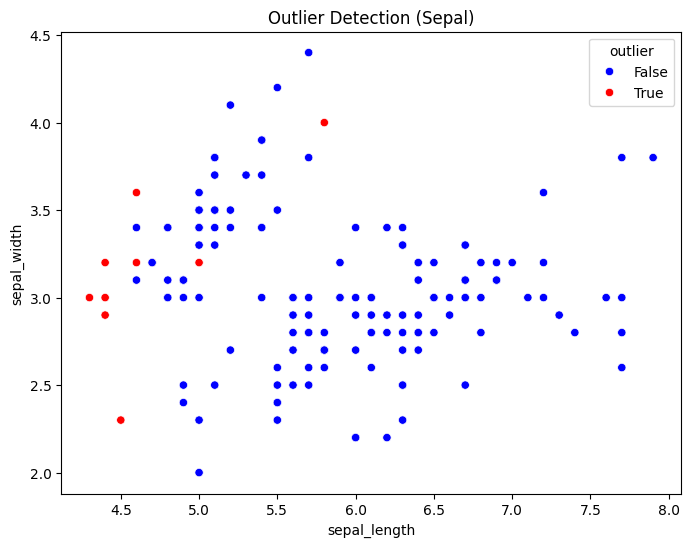

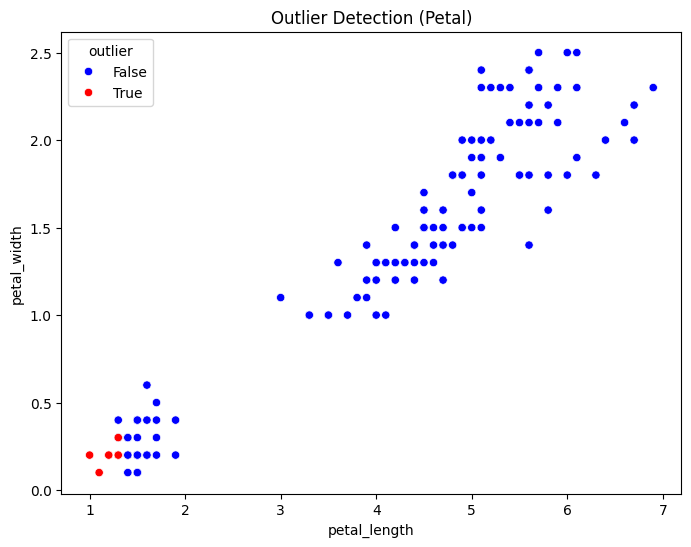

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-2784e994-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_7OwV6So2k6qKTb1yXO0",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel2")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-a971b40-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_xWwDDfEtRsiv7WGcUgO",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel1")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()

In [ ]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


### Penjelasan:

1. df_merged["outlier"] → Mengambil kolom yang menandai apakah suatu baris
merupakan outlier (True atau False).

2. .sum() → Karena nilai True dihitung sebagai 1 dan False sebagai 0, maka menjumlahkan kolom ini akan memberikan jumlah total outlier dalam dataset.

3. print(f"Total Outlier: {total_outliers}") → Menampilkan hasil total outlier yang ditemukan.

Hasil ini berguna untuk mengetahui seberapa banyak data yang dianggap anomali dalam analisis.

In [ ]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151            ????           5.8          1.0           5.1          3.2  0.000000    False
135  Iris-virginica           5.6          1.4           6.1          2.6  1.249000    False
150  Iris-virginica           5.1          1.8           5.9          3.0  1.345362    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7  1.382027    False
143  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
102  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
 85 Iris-versicolor           4.5          1.5           5.4          3.0  1.438749    False
104  Iris-virginica           5.6          1.8           6.3          2.9  1.486607    False
122  Iris-virginica           4.9          2.0           5.6          2.8  1.489966    False
 67 Iris-versicolor           4.5          1.5           5.6          

Code tersebut berfungsi untuk mengurutkan data berdasarkan jarak Euclidean dari referensi, dari yang paling mirip (jarak terkecil) hingga yang paling berbeda (jarak terbesar).

##Penjelasan:

1. df_merged.sort_values(by="distance", ascending=True)

Mengurutkan DataFrame berdasarkan kolom "distance".

ascending=True berarti urutan dari jarak terkecil ke terbesar.

Jika ingin urutan sebaliknya (terbesar ke terkecil), gunakan ascending=False.

2. print(df_sorted.to_string(index=False))

Menampilkan seluruh isi DataFrame dengan format tabel tanpa indeks.

Berguna untuk melihat pola dalam data setelah diurutkan.

##Manfaat:

Pola Kesamaan Data: Data dengan jarak kecil lebih mirip dengan referensi.
Analisis Outlier: Data dengan jarak besar berpotensi menjadi outlier.